<a href="https://colab.research.google.com/github/Lilly-yang/ELTE---Applied-Machine-Learning/blob/main/Assignment_1_Anomaly_detection_on_Simpsons_and_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1/D
**Disclaimer: Only for ADL/AML students!**

### General information
**You have to solve all tasks to pass!** 

Grade is calculated by the day of the last submission, but you will only get it after you've succesfully presented it. 

**Deadlines and grades:** 
  * 2020.09.20 - 2020.10.27 ==> 5
  * 2020.10.28 - 2020.11.03 ==> 4
  * 2020.10.04 - 2020.11.10 ==> 3
  * 2020.11.11 - 2020.11.17 ==> 2
  * 2020.11.18 or later ==> 1 

You can **use only these** 3rd party **packages:** `cv2, keras, matplotlib, numpy, sklearn, skimage, tensorflow`.

### Description
In this assignment you have to build a reconstruction loss based anomaly detection model using tf.keras. You have to train an autoencoder to reconstruct Homer Simpson images, then use the trained model to classify Simpson and Flower images. To implement such kind of models, you should take a look at the following classes and methods: `Sequential model, Funcitonal API, MaxPooling2D, Conv2DTranspose`.

### Use GPU
Runtime -> Change runtime type

At Hardware accelerator select  GPU then save it.  

### Useful shortcuts
* Run selected cell: *Ctrl + Enter*
* Insert cell below: *Ctrl + M B*
* Insert cell above: *Ctrl + M A*
* Convert to text: *Ctrl + M M*
* Split at cursor: *Ctrl + M -*
* Autocomplete: *Ctrl + Space* or *Tab*
* Move selected cells up: *Ctrl + M J*
* Move selected cells down: *Ctrl + M K*
* Delete selected cells: *Ctrl + M D*

## Prepare dataset

### Simpsons
* Download the Simpsons Characters dataset. Here you can find more information about the dataset: https://www.kaggle.com/alexattia/the-simpsons-characters-dataset
* After extracting it, select only those images, on which Homer Simpson is present.
* Resize all image to be 64x64.
* Then split the datasets into train-val-test sets (ratio: 60-20-20), without shuffling.
* Print the size of each set and plot 5 training images.
* Normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

### Flowers
* Download the Flowes Recognition dataset. Here you can find more information about the dataset: https://www.kaggle.com/alxmamaev/flowers-recognition
* After extracting it, resize all image to be 64x64.
* Print the size of each set and plot 5 training images.
* And finally normalize the datasets. All value should be between -1.0 and 1.0. *Note: you don't have to use standardization, you can just divide them by 255.*

In [ ]:
# Simpsons characters

# Download from Drive
!if ! [ -f simpsons_dataset.zip ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1odJvgHZXoShkWN5s3FNE1nDW_7wzxS3J" -o simpsons_dataset.zip; fi

# Check if the file size is correct (~1.07GB)
!if (( $(stat -c%s simpsons_dataset.zip) < 1158208931 )); then rm -rfd simpsons_dataset.zip; fi

# If not, download it from NIPG12
!wget -nc -O simpsons_dataset.zip http://nipg1.inf.elte.hu:8000/simpsons_dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3547      0 --:--:-- --:--:-- --:--:--  3547
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1104M    0 1104M    0     0  56.6M      0 --:--:--  0:00:19 --:--:-- 58.5M
File ‘simpsons_dataset.zip’ already there; not retrieving.


In [ ]:
!unzip simpsons_dataset.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1283.jpg  
  inflating

In [ ]:
# Flowers Recgonition

# Download from Drive
!if ! [ -f flowers-recognition.zip ]; then curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" > /dev/null; curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1X1BDlF-Zuu7TIL9K4f7qOn7KGbS2_csw" -o flowers-recognition.zip; fi

# Check if the file size is correct (~224MB)
!if (( $(stat -c%s flowers-recognition.zip) < 235781000 )); then rm -rfd flowers-recognition.zip; fi

# If not, download it from NIPG12
!wget -nc -O flowers-recognition.zip http://nipg12.inf.elte.hu:8000/flowers-recognition.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1446      0 --:--:-- --:--:-- --:--:--  1441
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  224M    0  224M    0     0  53.5M      0 --:--:--  0:00:04 --:--:-- 78.9M
File ‘flowers-recognition.zip’ already there; not retrieving.


In [ ]:
!unzip flowers-recognition.zip

Archive:  flowers-recognition.zip
   creating: flowers/
   creating: flowers/daisy/
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating

In [ ]:
%matplotlib inline
%tensorflow_version 2.x

import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from sklearn.metrics import accuracy_score

---loading simpson dataset---
simpson dataset size:  2246
data splication:
 train dataset:  1347 
 validation dataset:  449 
 test dataset:  450


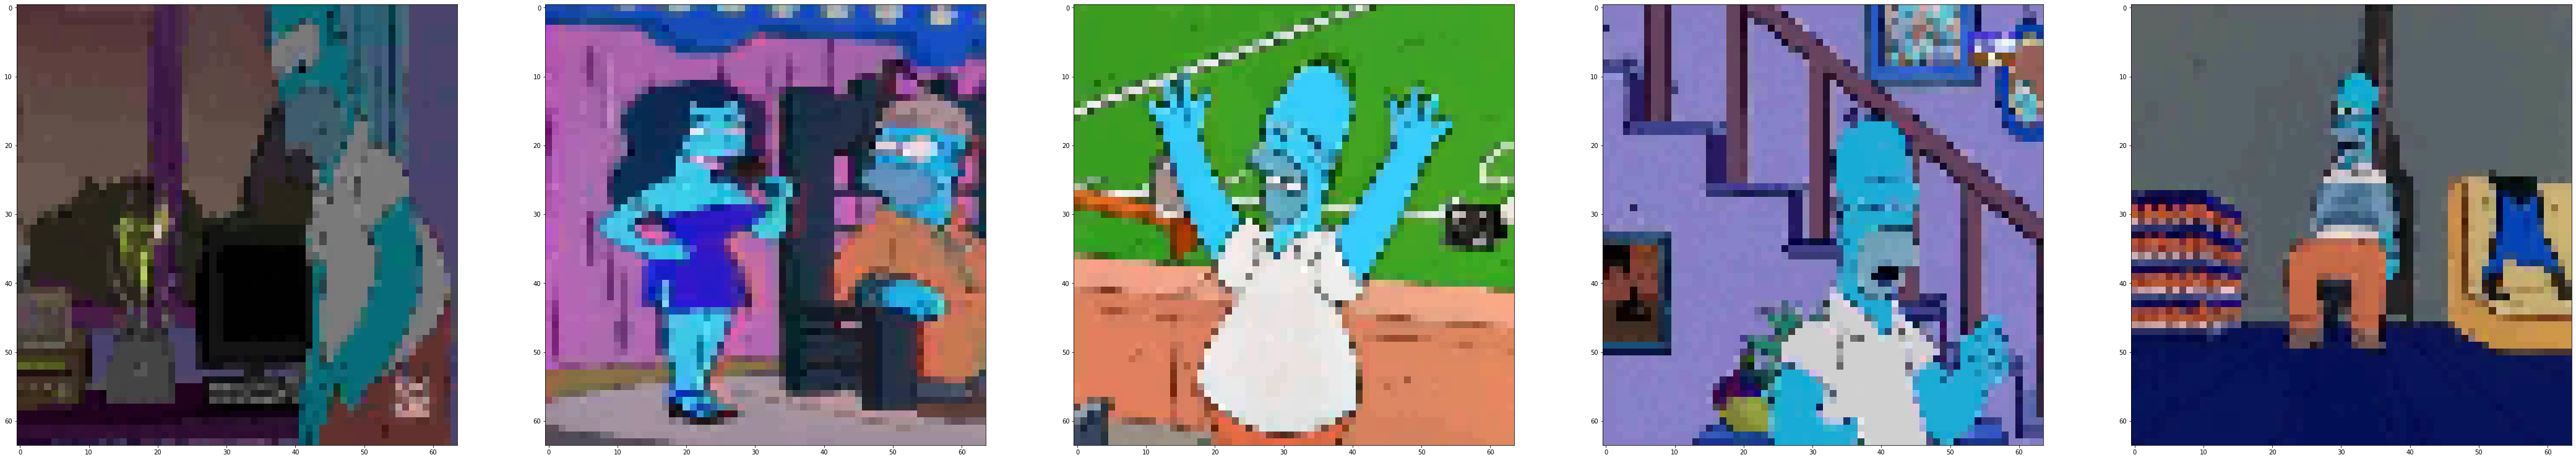

data array size:
 train dataset array size:  (1347, 64, 64, 3) 
 validation data array size (449, 64, 64, 3) 
 test data array size: (450, 64, 64, 3)
---loading flower dataset---
wrong image file:  /content/flowers/dandelion/run_me.py
wrong image file:  /content/flowers/dandelion/flickr.pyc
wrong image file:  /content/flowers/dandelion/flickr.py
flower_data size:  4323


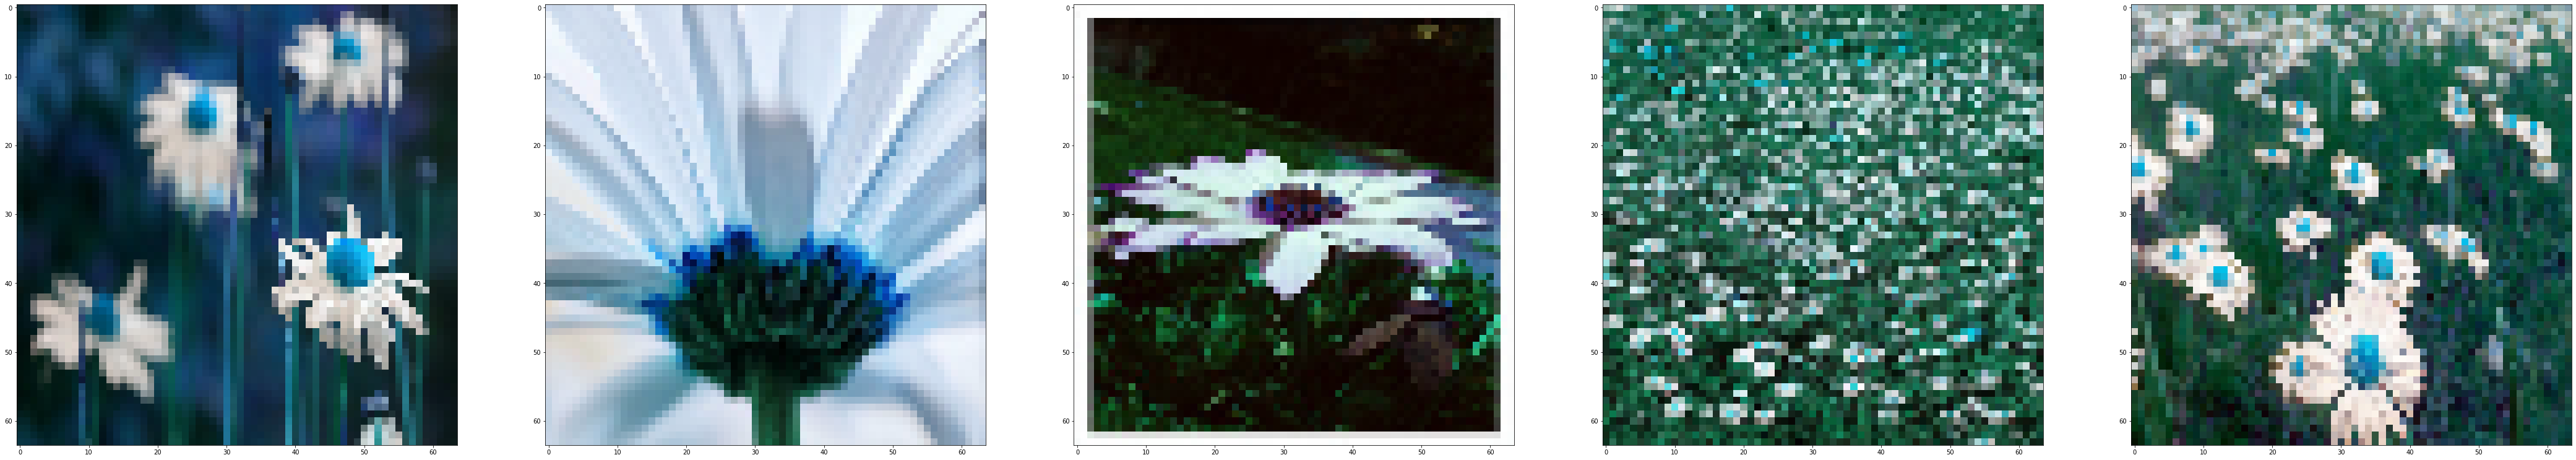

flower_data array size:  (4323, 64, 64, 3)


In [ ]:
def data_load(path):
    data_list = []

    for rot, dir, pics in os.walk(path):
        if pics:
            for pic in pics:
                temp = cv2.imread(os.path.join(rot, pic))
                if temp is None:
                    print('wrong image file: ', os.path.join(rot, pic))
                else:
                    data_list.append(temp)

    return data_list


def data_split(data_sets, ration=None, if_array=False, if_print=True):
    if ration is None:
        ration = [6, 2, 2]
    total = len(data_sets)
    x_tra = data_sets[:int(total * .1 * ration[0])]
    x_val = data_sets[int(total * .1 * ration[0]):int(total * .1 * sum(ration[:2]))]
    x_tes = data_sets[int(total * .1 * sum(ration[:2])):]

    if if_print:
        print(' train dataset: ', len(x_tra), '\n validation dataset: ', len(x_val),
              '\n test dataset: ', len(x_tes))

    if if_array:
        return np.array(x_tra), np.array(x_val), np.zrray(x_tes)
    else:
        return x_tra, x_val, x_tes


def data_preprocess(data_lists, re_size=(), norm=False, if_array=False, 
                    muilti_dataset=False):
    if not muilti_dataset:
        data_lists = [data_lists]

    for i, data_list in enumerate(data_lists):
        for j, pic in enumerate(data_list):
            if len(re_size) > 0:
                try:
                    data_list[j] = cv2.resize(pic, re_size)
                except:
                    print('worning, picture can not be resized!', pic)

            if norm:
                data_list[j] = pic.astype('float32') / 255.

        if if_array:
            data_list = np.array(data_list)

        data_lists[i] = data_list

    if not muilti_dataset:
        data_lists = data_lists[0]

    return data_lists


def img_plot(imgs, plot_number=5):
    plt.figure(figsize=(74, 370))
    for i in range(plot_number):
        plt.subplot(1, plot_number, i + 1)
        plt.imshow(imgs[i])

    plt.show()


## load Simpson data
print('---loading simpson dataset---')
simpson_path = '/content/simpsons_dataset/homer_simpson'
simpson_data = data_load(simpson_path)
print('simpson dataset size: ', len(simpson_data))

simpson_data = data_preprocess(simpson_data, re_size=(64, 64))  # resize data to (64,64)

print('data splication:')
simpson_tra, simpson_val, simpson_tes = data_split(simpson_data)  # split data to train/validation/test
img_plot(simpson_tra)

simpson_tra, simpson_val, simpson_tes = data_preprocess([simpson_tra, simpson_val, simpson_tes], 
                                                        norm=True, if_array=True, 
                                                        muilti_dataset=True)  # normolization
print('data array size:\n train dataset array size: ', simpson_tra.shape,
      '\n validation data array size', simpson_val.shape, 
      '\n test data array size:', simpson_tes.shape)

## load Flower data
print('---loading flower dataset---')
flower_path = '/content/flowers'  # father director
flower_data = data_load(flower_path)
print('flower_data size: ', len(flower_data))

flower_data = data_preprocess(flower_data, re_size=(64, 64))  # resize data to (64,64)
img_plot(flower_data)

flower_data = data_preprocess(flower_data, norm=True, if_array=True)  # normolization
print('flower_data array size: ', flower_data.shape)

## Data augmentation
  * Augment the training set using `ImageDataGenerator`. The parameters should be the following: `featurewise_center=False, featurewise_std_normalization=False, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, horizontal_flip=True`.
  * When creating the generator(s), use shuffling with a seed value of 0 and batch size of 128.
  * To validate that the augmentation is working, plot 5 original images with their corresponding transformed (augmented) images.

**Keep in mind:** Your task is to reconstuct images, so your target is your input. To augment the inputs and targets the same way, you should create 2 separate generator, then you can zip them together.


---generator test--- 
 ---original images----


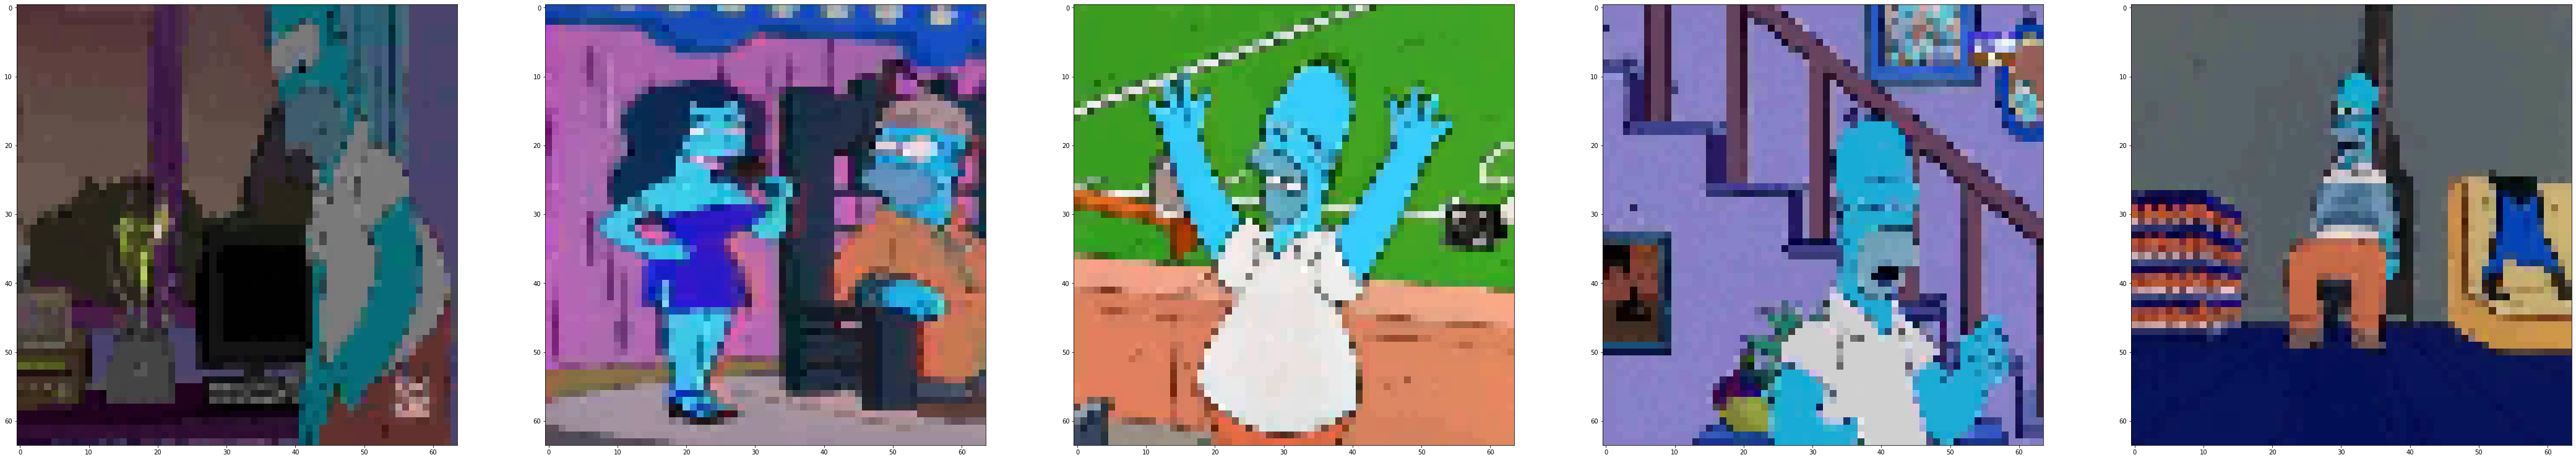

---transformed images---


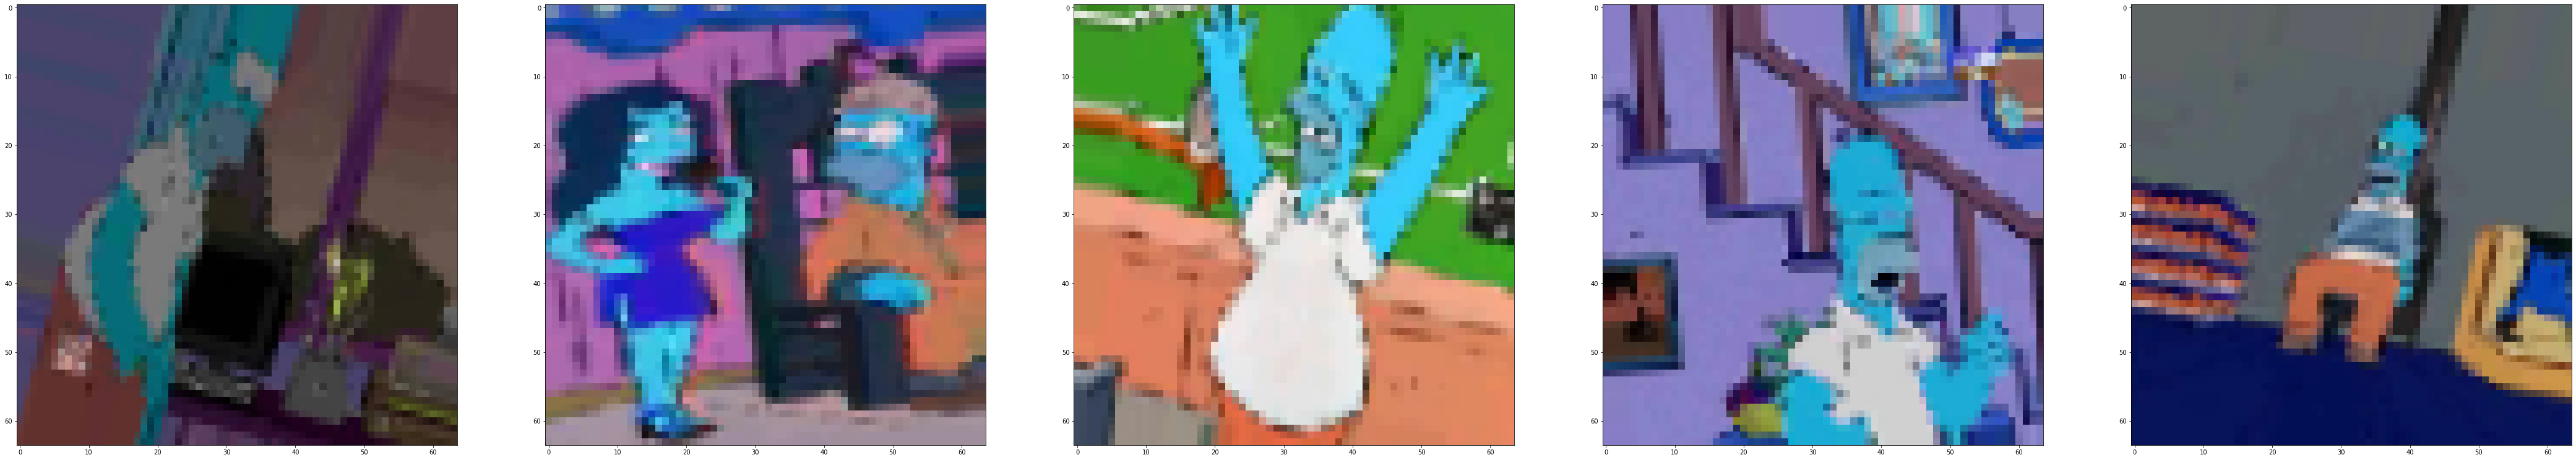

In [ ]:
batch_size = 128

# initialize an data augmenter as an 'empty' image data generator
data_generator = ImageDataGenerator(featurewise_center=False, featurewise_std_normalization=False,
                                    rotation_range=15, width_shift_range=0.1, height_shift_range=0.1,
                                    zoom_range=0.2, horizontal_flip=True)

print('---generator test--- \n ---original images----')
img_plot(simpson_tra)
print('---transformed images---')
img_plot(next(data_generator.flow(simpson_tra, shuffle=False)))

# simpson train dataset generator
input_generator = data_generator.flow(simpson_tra, shuffle=True, seed=0, batch_size=batch_size)
output_generator = data_generator.flow(simpson_tra, shuffle=True, seed=0, batch_size=batch_size)

# simpson validation dataset generator
input_val_generator = data_generator.flow(simpson_val, shuffle=True, seed=0, batch_size=batch_size)
ouput_val_generator = data_generator.flow(simpson_val, shuffle=True, seed=0, batch_size=batch_size)


## Define the model
Define the following architecture in tf.keras:
```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 64)           0         
_________________________________________________________________
dense (Dense)                (None, 256, 1024)         66560     
_________________________________________________________________
dense_1 (Dense)              (None, 256, 256)          262400    
_________________________________________________________________
reshape_1 (Reshape)          (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 64)        147520    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 3)         867       
=================================================================
Total params: 653,731
Trainable params: 653,731
Non-trainable params: 0
_________________________________________________________________
```
* Use relu, a kernel size of 3x3 and `padding='same'` for each layer.
* Use a 3x3 `Conv2DTranspose` layer to upsample the result. 
* For optimizer use Adam, and MAE as loss function, and add MSE as a metric.


In [ ]:
# Define a convolutional autoencoder 
class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            Input(shape=(64, 64, 3)),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            MaxPool2D(),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            MaxPool2D(),
            Reshape((256, 64)),
            Dense(1024, activation='relu')])

        self.decoder = tf.keras.Sequential([
            Dense(256, activation='relu'),
            Reshape((16, 16, 256)),
            Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same'),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            Conv2D(3, (3, 3), activation='relu', padding='same')])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


autoencoder = AnomalyDetector()

autoencoder.compile(optimizer="adam", loss="mae", metrics=["mse"])  # mae-'Mean Absolute Error', mse-'mean squared error'

## Training and evaluation 
  * Train the model on the augmented data for 200 epochs without early stopping.
  * Plot the training curve (train/validation loss and mse).
  * Evaluate the trained model on the test set.
  * Plot some (5) reconstruction examples. (Input and prediction pairs.)
  * Calculate the mean and the std of the MAE loss on the **validation dataset** (*not on the loss history*), then set the classification threshold to the following: `<thrs> = <mean> + 0.5*<std>`. *Note: To get the mean and std, you have iterate over all validation samples and calculate the reconstruction loss on each.*
  * Evaluate the classification performance on the test set.
  * And finally evaluate the classification performance on the Flowers dataset. 

In [ ]:
# train autoencoder(model)
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
H = autoencoder.fit(zip(input_generator, output_generator), epochs=200, 
                    steps_per_epoch=len(simpson_tra) / batch_size,
                    validation_data=zip(input_val_generator, ouput_val_generator),
                    validation_steps=len(simpson_val) / batch_size)

Epoch 1/200
11/10 [===============================] - 4s 402ms/step - loss: 0.3800 - mse: 0.2117 - val_loss: 0.3901 - val_mse: 0.2112
Epoch 2/200
11/10 [===============================] - 4s 387ms/step - loss: 0.3380 - mse: 0.1698 - val_loss: 0.2700 - val_mse: 0.1060
Epoch 3/200
11/10 [===============================] - 4s 387ms/step - loss: 0.2136 - mse: 0.0707 - val_loss: 0.1808 - val_mse: 0.0483
Epoch 4/200
11/10 [===============================] - 4s 371ms/step - loss: 0.1750 - mse: 0.0460 - val_loss: 0.1679 - val_mse: 0.0444
Epoch 5/200
11/10 [===============================] - 4s 385ms/step - loss: 0.1506 - mse: 0.0371 - val_loss: 0.1489 - val_mse: 0.0370
Epoch 6/200
11/10 [===============================] - 4s 385ms/step - loss: 0.1438 - mse: 0.0347 - val_loss: 0.1441 - val_mse: 0.0353
Epoch 7/200
11/10 [===============================] - 4s 383ms/step - loss: 0.1373 - mse: 0.0321 - val_loss: 0.1379 - val_mse: 0.0333
Epoch 8/200
11/10 [===============================] - 4s 377ms

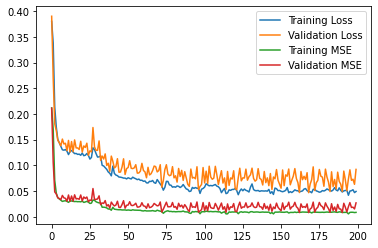

In [ ]:
## Plot the training curve
# train/validation loss
plt.plot(H.history["loss"], label="Training Loss")  
plt.plot(H.history["val_loss"], label="Validation Loss")
plt.legend()

# train/validation mse
plt.plot(H.history["mse"], label="Training MSE")
plt.plot(H.history["val_mse"], label="Validation MSE")
plt.legend()

---original input images---


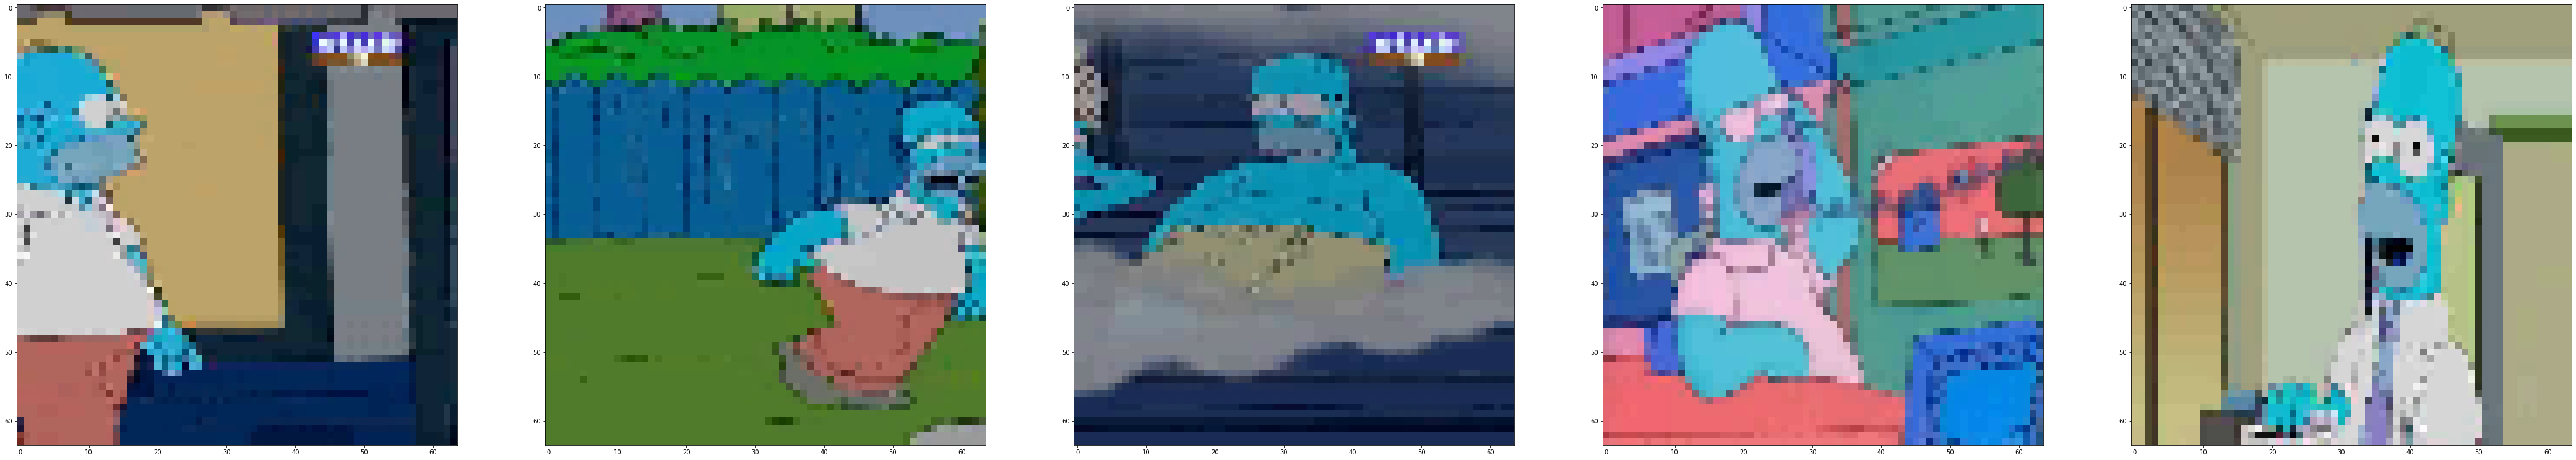

---reconstracted output images---


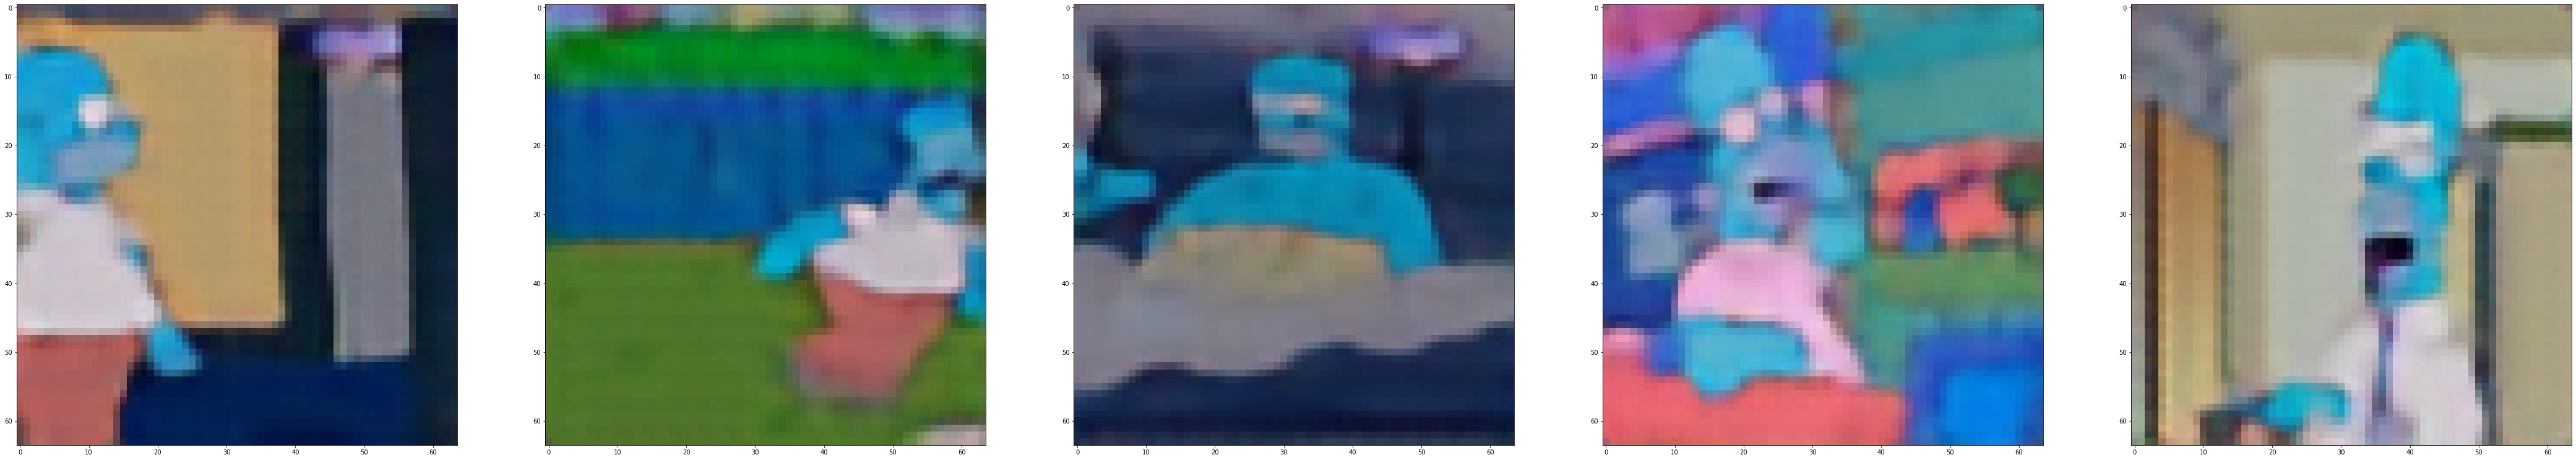

In [ ]:
# test the autoencoder on simpson test dataset
encoded_imgs = autoencoder.encoder(simpson_tes).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

# evaluste the trained autoencoder by compaire the inputs and correspoding outputs
print('---original input images---')
img_plot(simpson_tes)

print('---reconstracted output images---')
img_plot(decoded_imgs)

In [ ]:
# set the classification threshold based on the simpson validation dataset
reconstructions = autoencoder.predict(simpson_val)
train_loss = tf.keras.losses.mae(reconstructions, simpson_val)
threshold = np.mean(train_loss) + 0.5 * np.std(train_loss)
print('The threshold is: ', threshold)

The threshold is:  0.07778923027217388


In [ ]:
def predict(model, data, threshold):
    reconstructions = model.predict(data)
    loss = tf.keras.losses.mae(reconstructions, data)

    loss = np.array([np.mean(i) for i in loss])

    return tf.math.less(loss, threshold)


def print_stats(predictions, labels):
    print("Accuracy = {}".format(accuracy_score(labels, predictions)))


# test simpson test dataset
preds = predict(autoencoder, simpson_tes, threshold)
labels = np.array([1] * len(simpson_tes)) # all the data is normal data
print("Accuracy(Simpson test dataset) = {}".format(accuracy_score(labels, preds)))

# test flower dataset
flower_preds = predict(autoencoder, flower_data, threshold)
flower_labels = np.array([0] * len(flower_data))
print("Accuracy(Flower dataset) = {}".format(accuracy_score(flower_labels, flower_preds)))  # all the data is anomaly data

Accuracy(Simpson test dataset) = 0.98
Accuracy(Flower dataset) = 0.2556095304186907
